In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import math

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/manishanker/Statistics_ML_26Aug/master/titanic_data.csv")

In [3]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df.shape


(891, 12)

In [5]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

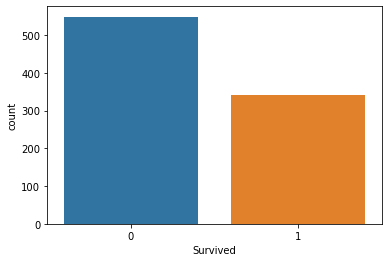

In [7]:
sns.countplot("Survived", data=(df))

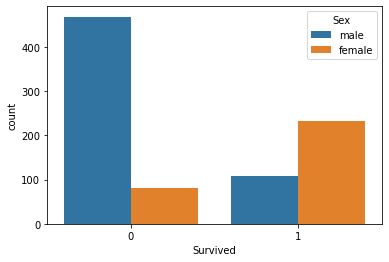

In [8]:
sns.countplot("Survived", hue="Sex", data=(df))

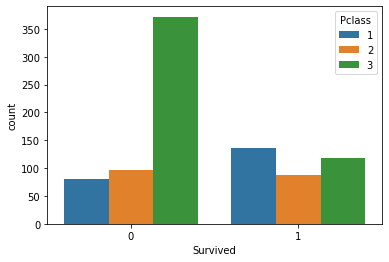

In [9]:
sns.countplot("Survived", hue="Pclass", data=(df))

In [10]:
df.Age.unique.count

AttributeError: 'function' object has no attribute 'count'

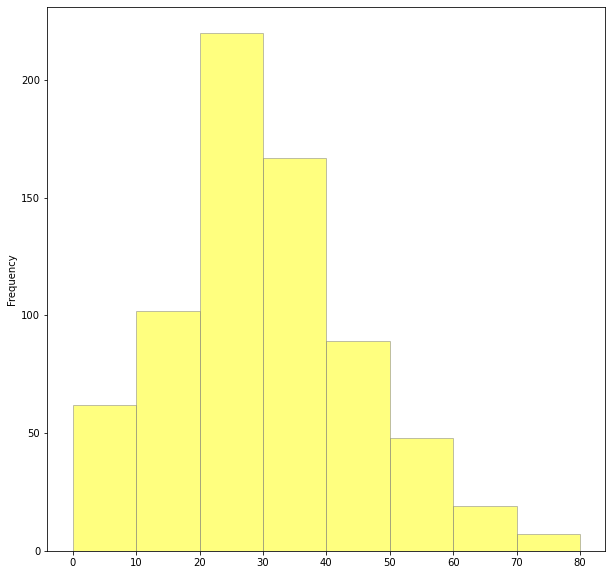

In [11]:
from matplotlib import pyplot as plt
plt.xticks(range(0,80,5))
plt.xticks(range(0,300,10))
df["Age"].plot.hist(bins=[0,10,20,30,40,50,60,70,80], 
                   figsize=(10,10), alpha=0.5, facecolor="yellow", edgecolor="gray")

In [12]:
#How many older ppl are on the ship

In [13]:
len(df[(df["Age"] <= 45) & (df["Age"] >= 25) ]["Age"])

333

In [14]:
df.info()   # Dtype - Object usually represens categorical variables, remianing int/float will be continuous vars

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


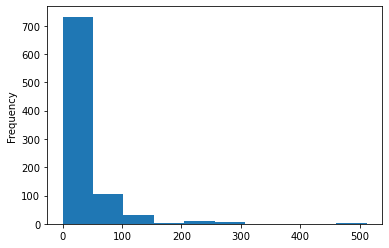

In [15]:
df["Fare"].plot.hist()

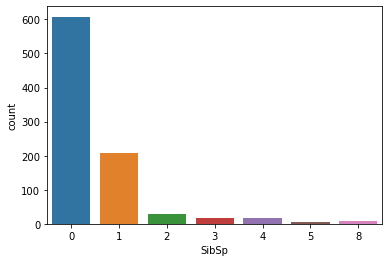

In [16]:
sns.countplot("SibSp", data=df)

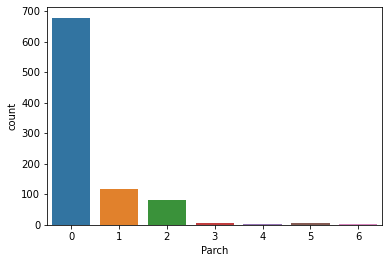

In [17]:
sns.countplot("Parch", data=df)

In [18]:
#Data cleaning / wrangling

In [19]:
#what % null values are present in each column

In [20]:
df.isna().sum()/891 *100   

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [21]:
df.isna().sum() / df.shape[0]

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

In [22]:
df.drop("Cabin" , axis=1 , inplace=True)

In [23]:
#df.dropna(inplace=True)

In [24]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [25]:
df["Age"].median()

28.0

In [26]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [27]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [28]:
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [29]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode())

In [30]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [31]:
df["Age"].median()

28.0

In [32]:
df["Age"].mode()

0    28.0
dtype: float64

In [33]:
df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [34]:
df["Embarked"].mode().values[0]

'S'

In [35]:
df["Embarked"].mode()

0    S
dtype: object

In [36]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode().values[0])

In [37]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [38]:
#Cleaning is done

In [39]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [40]:
## EDA Box plot

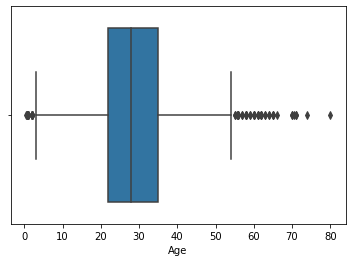

In [41]:
sns.boxplot(df["Age"] , data=df)

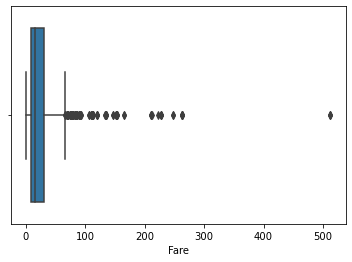

In [42]:
sns.boxplot(df["Fare"] , data=df)

# removing outliers is pending

In [43]:
len(df[(df["Age"] >= 55)]) / df.shape[0]  # %

0.04713804713804714

# Removing duplicates

In [44]:
df.duplicated().sum()

0

In [45]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [46]:
#df["Ticket"].unique()

In [47]:
len(df["Ticket"].unique())

681

In [48]:
#sns.countplot("Pclass", hue="Ticket", data=(df))

In [49]:
# converting categorical columns with one hot encoding (OHE) , Label encoding we usually use with Target variable
# get dummies is used for one hot encoding
# drop_first = True - only one column will be reatined

In [50]:
sex = pd.get_dummies(df["Sex"], drop_first=False) 
sex.head(10)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [51]:
sex = pd.get_dummies(df["Sex"], drop_first=True) 
sex.head(10)

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [52]:
embark = pd.get_dummies(df["Embarked"], drop_first=True) 
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [53]:
embark = pd.get_dummies(df["Embarked"], drop_first=False) 
embark

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [54]:
pcl = pd.get_dummies(df["Pclass"])

In [55]:
df = pd.concat([df, sex, embark, pcl], axis=1)

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,C,Q,S,1,2,3
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,1,0,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,0,1,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,0,1,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,0,1,0,0,1


In [57]:
df.drop(["PassengerId", "Name", "Sex", "Pclass", "Ticket" , "Embarked"] , axis=1, inplace=True)

In [58]:
df.head(10)

,Survived,Age,SibSp,Parch,Fare,male,C,Q,S,1,2,3
0,0,22.0,1,0,7.2500,1,0,0,1,0,0,1
1,1,38.0,1,0,71.2833,0,1,0,0,1,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,1,1,0,0
4,0,35.0,0,0,8.0500,1,0,0,1,0,0,1
5,0,28.0,0,0,8.4583,1,0,1,0,0,0,1
6,0,54.0,0,0,51.8625,1,0,0,1,1,0,0
7,0,2.0,3,1,21.0750,1,0,0,1,0,0,1
8,1,27.0,0,2,11.1333,0,0,0,1,0,0,1
9,1,14.0,1,0,30.0708,0,1,0,0,0,1,0


In [59]:
parch = pd.get_dummies(df["Parch"])
parch.columns = ["parch" + str(column) for column in parch.columns]
parch

,parch0,parch1,parch2,parch3,parch4,parch5,parch6
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
886,1,0,0,0,0,0,0
887,1,0,0,0,0,0,0
888,0,0,1,0,0,0,0
889,1,0,0,0,0,0,0


In [60]:
# embarked = pd.get_dummies(df.Embarked, prefix='Embarked')


In [61]:
df = pd.concat([df, parch], axis=1)

In [62]:
df

,Survived,Age,SibSp,Parch,Fare,male,C,Q,S,1,2,3,parch0,parch1,parch2,parch3,parch4,parch5,parch6
0,0,22.0,1,0,7.2500,1,0,0,1,0,0,1,1,0,0,0,0,0,0
1,1,38.0,1,0,71.2833,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,0,1,0,0,1,1,0,0,0,0,0,0
3,1,35.0,1,0,53.1000,0,0,0,1,1,0,0,1,0,0,0,0,0,0
4,0,35.0,0,0,8.0500,1,0,0,1,0,0,1,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,0,1,0,1,0,1,0,0,0,0,0,0
887,1,19.0,0,0,30.0000,0,0,0,1,1,0,0,1,0,0,0,0,0,0
888,0,28.0,1,2,23.4500,0,0,0,1,0,0,1,0,0,1,0,0,0,0
889,1,26.0,0,0,30.0000,1,1,0,0,1,0,0,1,0,0,0,0,0,0


In [63]:
df.drop(["Parch"], axis=1, inplace=True)

In [64]:
df.head()

,Survived,Age,SibSp,Fare,male,C,Q,S,1,2,3,parch0,parch1,parch2,parch3,parch4,parch5,parch6
0,0,22.0,1,7.2500,1,0,0,1,0,0,1,1,0,0,0,0,0,0
1,1,38.0,1,71.2833,0,1,0,0,1,0,0,1,0,0,0,0,0,0
2,1,26.0,0,7.9250,0,0,0,1,0,0,1,1,0,0,0,0,0,0
3,1,35.0,1,53.1000,0,0,0,1,1,0,0,1,0,0,0,0,0,0
4,0,35.0,0,8.0500,1,0,0,1,0,0,1,1,0,0,0,0,0,0


In [65]:
# Test train split

In [66]:
X = df.drop(["Survived"], axis =1)
y = df["Survived"]

In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train, X_test, y_train, y_test = train_test_split (X, y, test_size= 0.3, random_state=444)

In [69]:
from sklearn.linear_model import LogisticRegression

In [70]:
model = LogisticRegression(max_iter=1000)

In [88]:
X_train

,Age,SibSp,Fare,male,C,Q,S,1,2,3,parch0,parch1,parch2,parch3,parch4,parch5,parch6
222,51.0,0,8.0500,1,0,0,1,0,0,1,1,0,0,0,0,0,0
747,30.0,0,13.0000,0,0,0,1,0,1,0,1,0,0,0,0,0,0
700,18.0,1,227.5250,0,1,0,0,1,0,0,1,0,0,0,0,0,0
312,26.0,1,26.0000,0,0,0,1,0,1,0,0,1,0,0,0,0,0
56,21.0,0,10.5000,0,0,0,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,19.0,0,8.1583,1,0,0,1,0,0,1,1,0,0,0,0,0,0
264,28.0,0,7.7500,0,0,1,0,0,0,1,1,0,0,0,0,0,0
791,16.0,0,26.0000,1,0,0,1,0,1,0,1,0,0,0,0,0,0
112,22.0,0,8.0500,1,0,0,1,0,0,1,1,0,0,0,0,0,0


In [89]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [90]:
predictions = model.predict(X_test)

In [91]:
from sklearn.metrics import classification_report

In [92]:
 print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       167
           1       0.80      0.74      0.77       101

    accuracy                           0.83       268
   macro avg       0.82      0.81      0.82       268
weighted avg       0.83      0.83      0.83       268



In [93]:
y_test.value_counts()

0    167
1    101
Name: Survived, dtype: int64

In [122]:
y_train.value_counts()

0    382
1    241
Name: Survived, dtype: int64

In [94]:
from sklearn.metrics import confusion_matrix

In [95]:
confusion_matrix(y_test, predictions)

array([[148,  19],
       [ 26,  75]], dtype=int64)

In [96]:
pd.DataFrame({"y_test": y_test, "predicted":predictions})

,y_test,predicted
635,1,1
266,0,0
377,0,1
604,1,0
342,0,0
...,...,...
673,1,0
385,0,0
560,0,0
516,1,1


In [97]:
from sklearn.metrics import accuracy_score

In [98]:
accuracy_score(y_test, predictions)

0.832089552238806

In [99]:
X_test.head(1)

,Age,SibSp,Fare,male,C,Q,S,1,2,3,parch0,parch1,parch2,parch3,parch4,parch5,parch6
635,28.0,0,13.0,0,0,0,1,0,1,0,1,0,0,0,0,0,0


In [100]:
X_brand_new = [[42., 0., 35., 1.,0., 0., 1., 0., 1., 0., 1., 0.,0.,0.,0.,0.,0.]]
X_brand_new

[[42.0,
  0.0,
  35.0,
  1.0,
  0.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0]]

In [101]:
model.predict(X_brand_new)

array([0], dtype=int64)

# Initialize Stnadard scaler

In [104]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [106]:
X_train_std = scaler.fit_transform(X_train)

In [107]:
model.fit(X_train_std, y_train)

LogisticRegression(max_iter=1000)

In [108]:
x_test_std = scaler.transform(X_test)

In [119]:
predictions = model.predict(x_test_std)

In [120]:
accuracy_score(y_test, predictions)

0.832089552238806

In [116]:
X_train_std

array([[ 1.69741085, -0.50613021, -0.51316076, ..., -0.06956083,
        -0.08038679,  0.        ],
       [ 0.07317563, -0.50613021, -0.39938983, ..., -0.06956083,
        -0.08038679,  0.        ],
       [-0.85495879,  0.47924204,  4.53125822, ..., -0.06956083,
        -0.08038679,  0.        ],
       ...,
       [-1.00964785, -0.50613021, -0.1005975 , ..., -0.06956083,
        -0.08038679,  0.        ],
       [-0.54558065, -0.50613021, -0.51316076, ..., -0.06956083,
        -0.08038679,  0.        ],
       [ 0.53724283, -0.50613021, -0.39938983, ..., -0.06956083,
        -0.08038679,  0.        ]])

In [117]:
x_test_std

array([[-0.08151344, -0.50613021, -0.39938983, ..., -0.06956083,
        -0.08038679,  0.        ],
       [-1.00964785,  3.4353588 ,  0.21399634, ..., -0.06956083,
        -0.08038679,  0.        ],
       [-0.15885798, -0.50613021,  4.16293921, ..., -0.06956083,
        -0.08038679,  0.        ],
       ...,
       [-0.08151344, -0.50613021, -0.52005597, ..., -0.06956083,
        -0.08038679,  0.        ],
       [ 0.38255376, -0.50613021, -0.4568499 , ..., -0.06956083,
        -0.08038679,  0.        ],
       [-0.85495879, -0.50613021, -0.47198028, ..., -0.06956083,
        -0.08038679,  0.        ]])

In [121]:
import sklearn
sklearn.__version__

'0.23.1'